**Project - Weather Forecasting Model**

In [1]:
import pandas as pd
import numpy as np

# Generate synthetic weather data
dates = pd.date_range(start="2024-01-01", periods=365, freq="D")
temperature = np.random.normal(loc=25, scale=5, size=len(dates))  # Average temp ~25°C

# Create DataFrame
df = pd.DataFrame({"date": dates, "temperature": temperature})
df.to_csv("weather_data.csv", index=False)

print("Sample dataset created: weather_data.csv")


Sample dataset created: weather_data.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error

In [3]:
# Load Weather Data (Replace with actual dataset in Colab)
df = pd.read_csv('weather_data.csv', parse_dates=['date'], index_col='date')
print(df.head())

            temperature
date                   
2024-01-01    27.370315
2024-01-02    24.967556
2024-01-03    21.165615
2024-01-04    27.942349
2024-01-05    30.846414


In [4]:
# Select feature (e.g., temperature)
data = df[['temperature']].values

In [5]:
# Normalize Data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [6]:
# Create Sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # Use past 10 days to predict the next day
X, y = create_sequences(data_scaled, seq_length)

In [7]:
# Split Data
train_size = int(0.8 * len(X))
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]


In [8]:
# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Train Model
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.1666 - val_loss: 0.0454
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0368 - val_loss: 0.0435
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0420 - val_loss: 0.0432
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0404 - val_loss: 0.0429
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0395 - val_loss: 0.0432
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0422 - val_loss: 0.0429
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0398 - val_loss: 0.0431
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0396 - val_loss: 0.0426
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0397 - val_loss: 0.0427
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0396 - val_loss: 0.0425
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0370 - val_loss: 0.0429
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0

In [10]:
# Predictions
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step


In [11]:
# Evaluate Model
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 4.01


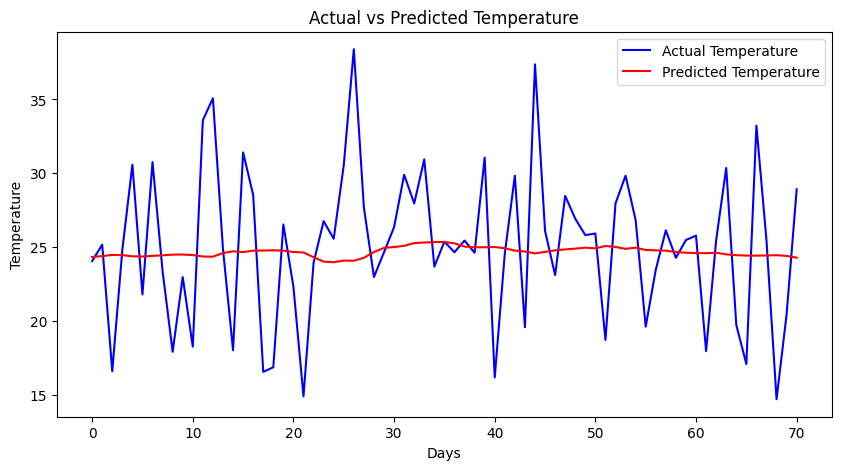

In [12]:
# Plot Predictions
plt.figure(figsize=(10, 5))
plt.plot(y_test_rescaled, label='Actual Temperature', color='blue')
plt.plot(y_pred_rescaled, label='Predicted Temperature', color='red')
plt.legend()
plt.xlabel("Days")
plt.ylabel("Temperature")
plt.title("Actual vs Predicted Temperature")
plt.show()


In [13]:
# Use the model for future prediction
latest_data = data_scaled[-seq_length:].reshape(1, seq_length, 1)
prediction = model.predict(latest_data)
predicted_temp = scaler.inverse_transform(prediction)[0][0]
print(f'Predicted Temperature for Next Day: {predicted_temp:.2f}°C')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Temperature for Next Day: 24.23°C
